In [1]:
import matplotlib.pylab as plt # I use version 3.1.2
#Notes for installing skimage: https://scikit-image.org/docs/dev/install.html
from skimage.morphology import skeletonize # I use version 0.16.2
import numpy as np # I use version 1.18.1
import cv2

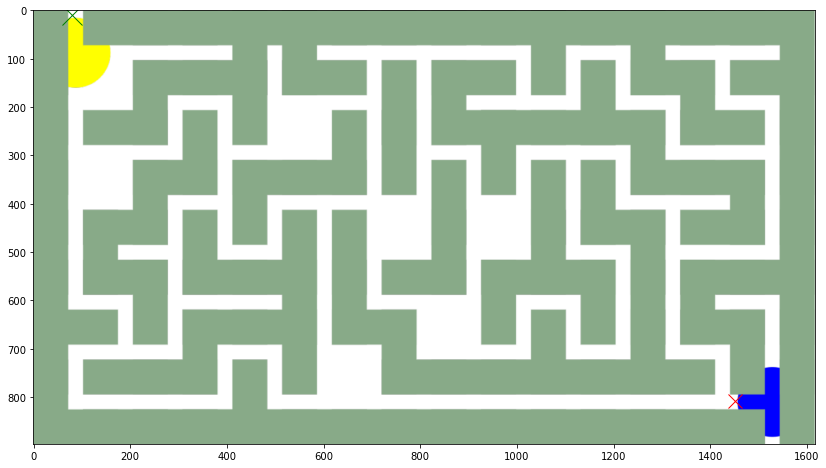

In [2]:
import matplotlib.pyplot as plt
img_name = "C:/Users/ADMIN/Downloads/Hackathon 416/Screenshot_20240212_182933.png"
rgb_img = plt.imread(img_name)

plt.figure(figsize=(14,14))
plt.imshow(rgb_img)
x0,y0 = 80, 10 #start x point
x1,y1 = 1450, 808 #start y point

plt.plot(x0,y0, 'gx', markersize = 20)
plt.plot(x1,y1, 'rx', markersize = 14)

In [3]:
import numpy as np

def generate_random_maze(rows, cols, density=0.3):
    maze = np.random.choice(['0', '1'], size=(rows, cols), p=[1 - density, density])
    return maze

def save_maze_to_file(maze, file_path):
    with open(file_path, 'w') as file:
        for row in maze:
            file.write(''.join(row) + '\n')

# Set the size of the maze
rows = 10
cols = 20

# Generate a random maze with a density of walls (1s) set to 0.3
random_maze = generate_random_maze(rows, cols, density=0.3)

# Replace with the desired file path to save the maze
maze_file_path = "C:/Users/ADMIN/Downloads/Hackathon 416/maze1.txt"

# Save the maze to a text file
save_maze_to_file(random_maze, maze_file_path)


Path found: [(0, 0), (0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (4, 2), (4, 3), (3, 3), (2, 3), (1, 3), (1, 4), (1, 5), (2, 5), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (3, 16), (4, 16), (5, 16), (5, 17), (5, 18), (6, 18), (7, 18), (8, 18), (8, 19), (9, 19)]


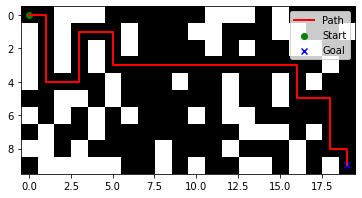

In [4]:
import numpy as np
import heapq
import matplotlib.pyplot as plt

class Node:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.g = 0
        self.h = 0
        self.parent = None

    def __lt__(self, other):
        return (self.g + self.h) < (other.g + other.h)

def heuristic(node, goal):
    return np.sqrt((node.x - goal.x) ** 2 + (node.y - goal.y) ** 2)

def read_maze(file_path):
    with open(file_path, 'r') as file:
        maze = [list(map(int, line.strip())) for line in file.readlines()]
    return maze

def astar(maze, start, goal):
    rows, cols = len(maze), len(maze[0])
    open_set = []
    closed_set = set()

    start_node = Node(start[0], start[1])
    goal_node = Node(goal[0], goal[1])

    heapq.heappush(open_set, start_node)

    while open_set:
        current_node = heapq.heappop(open_set)

        if current_node.x == goal_node.x and current_node.y == goal_node.y:
            path = []
            while current_node:
                path.append((current_node.x, current_node.y))
                current_node = current_node.parent
            return path[::-1]

        closed_set.add((current_node.x, current_node.y))

        for i, j in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
            neighbor_x, neighbor_y = current_node.x + i, current_node.y + j

            if (
                0 <= neighbor_x < rows
                and 0 <= neighbor_y < cols
                and maze[neighbor_x][neighbor_y] == 0
                and (neighbor_x, neighbor_y) not in closed_set
            ):
                neighbor_node = Node(neighbor_x, neighbor_y)
                neighbor_node.g = current_node.g + 1
                neighbor_node.h = heuristic(neighbor_node, goal_node)
                neighbor_node.parent = current_node

                if neighbor_node not in open_set:
                    heapq.heappush(open_set, neighbor_node)

    return None

# Replace with the actual file path of your maze
maze_file_path = "C:/Users/ADMIN/Downloads/exce.txt"
maze = read_maze(maze_file_path)

# Define start and goal points
start_point = (0, 0)
goal_point = (len(maze) - 1, len(maze[0]) - 1)

# Find the path using A*
path = astar(maze, start_point, goal_point)

if path:
    print("Path found:", path)
else:
    print("No path found.")

# Visualize the maze and path
plt.imshow(np.array(maze) == 1, cmap='gray', interpolation='none')

# Plot the path
if path:
    path_x, path_y = zip(*path)
    plt.plot(path_y, path_x, color='red', linewidth=2, label='Path')

# Mark the start and goal points
plt.scatter(start_point[1], start_point[0], color='green', marker='o', label='Start')
plt.scatter(goal_point[1], goal_point[0], color='blue', marker='x', label='Goal')

plt.legend()
plt.show()


In [5]:
import matplotlib.pylab as plt # I use version 3.1.2
#Notes for installing skimage: https://scikit-image.org/docs/dev/install.html
from skimage.morphology import skeletonize # I use version 0.16.2
import numpy as np # I use version 1.18.1
import cv2

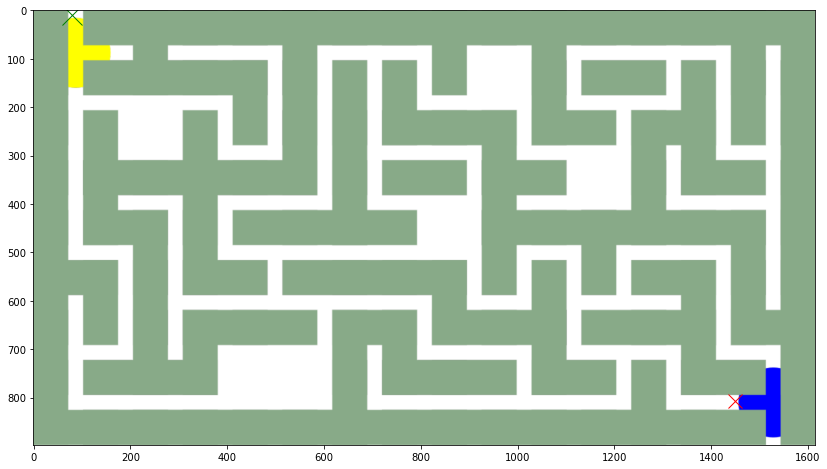

In [6]:
import matplotlib.pyplot as plt
img_name = "C:/Users/ADMIN/Downloads/Hackathon 416/Screenshot_20240212_182715.png"
rgb_img = plt.imread(img_name)

plt.figure(figsize=(14,14))
plt.imshow(rgb_img)
x0,y0 = 80, 10 #start x point
x1,y1 = 1450, 808 #start y point

plt.plot(x0,y0, 'gx', markersize = 20)
plt.plot(x1,y1, 'rx', markersize = 14)

In [19]:
import numpy as np

def generate_random_maze(rows, cols, density=0.3):
    maze = np.random.choice(['0', '1'], size=(rows, cols), p=[1 - density, density])
    return maze

def save_maze_to_file(maze, file_path):
    with open(file_path, 'w') as file:
        for row in maze:
            file.write(''.join(row) + '\n')

# Set the size of the maze
rows = 10
cols = 20

# Generate a random maze with a density of walls (1s) set to 0.3
random_maze = generate_random_maze(rows, cols, density=0.3)

# Replace with the desired file path to save the maze
maze_file_path = "C:/Users/ADMIN/Downloads/Hackathon 416/maze2.txt"

# Save the maze to a text file
save_maze_to_file(random_maze, maze_file_path)


Path found: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (1, 7), (2, 7), (2, 8), (2, 9), (3, 9), (3, 10), (3, 11), (3, 12), (4, 12), (5, 12), (5, 13), (6, 13), (7, 13), (7, 14), (7, 15), (8, 15), (8, 16), (8, 17), (7, 17), (7, 18), (7, 19), (8, 19), (9, 19)]


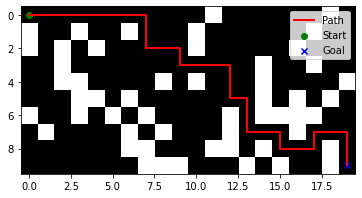

In [20]:
import numpy as np
import heapq
import matplotlib.pyplot as plt

class Node:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.g = 0
        self.h = 0
        self.parent = None

    def __lt__(self, other):
        return (self.g + self.h) < (other.g + other.h)

def heuristic(node, goal):
    return np.sqrt((node.x - goal.x) ** 2 + (node.y - goal.y) ** 2)

def read_maze(file_path):
    with open(file_path, 'r') as file:
        maze = [list(map(int, line.strip())) for line in file.readlines()]
    return maze

def astar(maze, start, goal):
    rows, cols = len(maze), len(maze[0])
    open_set = []
    closed_set = set()

    start_node = Node(start[0], start[1])
    goal_node = Node(goal[0], goal[1])

    heapq.heappush(open_set, start_node)

    while open_set:
        current_node = heapq.heappop(open_set)

        if current_node.x == goal_node.x and current_node.y == goal_node.y:
            path = []
            while current_node:
                path.append((current_node.x, current_node.y))
                current_node = current_node.parent
            return path[::-1]

        closed_set.add((current_node.x, current_node.y))

        for i, j in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
            neighbor_x, neighbor_y = current_node.x + i, current_node.y + j

            if (
                0 <= neighbor_x < rows
                and 0 <= neighbor_y < cols
                and maze[neighbor_x][neighbor_y] == 0
                and (neighbor_x, neighbor_y) not in closed_set
            ):
                neighbor_node = Node(neighbor_x, neighbor_y)
                neighbor_node.g = current_node.g + 1
                neighbor_node.h = heuristic(neighbor_node, goal_node)
                neighbor_node.parent = current_node

                if neighbor_node not in open_set:
                    heapq.heappush(open_set, neighbor_node)

    return None

# Replace with the actual file path of your maze
maze_file_path = "C:/Users/ADMIN/Downloads/Hackathon 416/maze2.txt"
maze = read_maze(maze_file_path)

# Define start and goal points
start_point = (0, 0)
goal_point = (len(maze) - 1, len(maze[0]) - 1)

# Find the path using A*
path = astar(maze, start_point, goal_point)

if path:
    print("Path found:", path)
else:
    print("No path found.")

# Visualize the maze and path
plt.imshow(np.array(maze) == 1, cmap='gray', interpolation='none')

# Plot the path
if path:
    path_x, path_y = zip(*path)
    plt.plot(path_y, path_x, color='red', linewidth=2, label='Path')

# Mark the start and goal points
plt.scatter(start_point[1], start_point[0], color='green', marker='o', label='Start')
plt.scatter(goal_point[1], goal_point[0], color='blue', marker='x', label='Goal')

plt.legend()
plt.show()


In [21]:
import matplotlib.pylab as plt # I use version 3.1.2
#Notes for installing skimage: https://scikit-image.org/docs/dev/install.html
from skimage.morphology import skeletonize # I use version 0.16.2
import numpy as np # I use version 1.18.1
import cv2

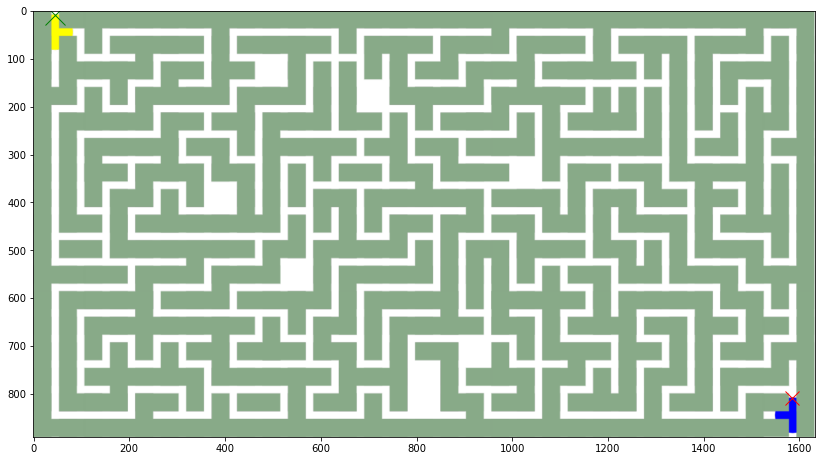

In [22]:
import matplotlib.pyplot as plt
img_name = "C:/Users/ADMIN/Downloads/Hackathon 416/Screenshot_20240212_182624.png"
rgb_img = plt.imread(img_name)

plt.figure(figsize=(14,14))
plt.imshow(rgb_img)
x0,y0 = 45, 8 #start x point
x1,y1 = 1585, 808 #start y point

plt.plot(x0,y0, 'gx', markersize = 20)
plt.plot(x1,y1, 'rx', markersize = 14)

In [25]:
import numpy as np

def generate_random_maze(rows, cols, density=0.3):
    maze = np.random.choice(['0', '1'], size=(rows, cols), p=[1 - density, density])
    return maze

def save_maze_to_file(maze, file_path):
    with open(file_path, 'w') as file:
        for row in maze:
            file.write(''.join(row) + '\n')

# Set the size of the maze
rows = 10
cols = 20

# Generate a random maze with a density of walls (1s) set to 0.3
random_maze = generate_random_maze(rows, cols, density=0.3)

# Replace with the desired file path to save the maze
maze_file_path = "C:/Users/ADMIN/Downloads/Hackathon 416/maze3.txt"

# Save the maze to a text file
save_maze_to_file(random_maze, maze_file_path)


Path found: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 5), (1, 6), (1, 7), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (4, 15), (5, 15), (5, 16), (6, 16), (7, 16), (8, 16), (8, 17), (8, 18), (8, 19), (9, 19)]


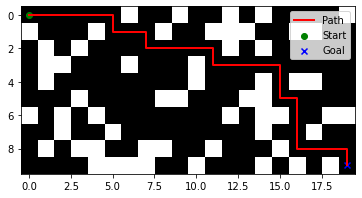

In [26]:
import numpy as np
import heapq
import matplotlib.pyplot as plt

class Node:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.g = 0
        self.h = 0
        self.parent = None

    def __lt__(self, other):
        return (self.g + self.h) < (other.g + other.h)

def heuristic(node, goal):
    return np.sqrt((node.x - goal.x) ** 2 + (node.y - goal.y) ** 2)

def read_maze(file_path):
    with open(file_path, 'r') as file:
        maze = [list(map(int, line.strip())) for line in file.readlines()]
    return maze

def astar(maze, start, goal):
    rows, cols = len(maze), len(maze[0])
    open_set = []
    closed_set = set()

    start_node = Node(start[0], start[1])
    goal_node = Node(goal[0], goal[1])

    heapq.heappush(open_set, start_node)

    while open_set:
        current_node = heapq.heappop(open_set)

        if current_node.x == goal_node.x and current_node.y == goal_node.y:
            path = []
            while current_node:
                path.append((current_node.x, current_node.y))
                current_node = current_node.parent
            return path[::-1]

        closed_set.add((current_node.x, current_node.y))

        for i, j in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
            neighbor_x, neighbor_y = current_node.x + i, current_node.y + j

            if (
                0 <= neighbor_x < rows
                and 0 <= neighbor_y < cols
                and maze[neighbor_x][neighbor_y] == 0
                and (neighbor_x, neighbor_y) not in closed_set
            ):
                neighbor_node = Node(neighbor_x, neighbor_y)
                neighbor_node.g = current_node.g + 1
                neighbor_node.h = heuristic(neighbor_node, goal_node)
                neighbor_node.parent = current_node

                if neighbor_node not in open_set:
                    heapq.heappush(open_set, neighbor_node)

    return None

# Replace with the actual file path of your maze
maze_file_path = "C:/Users/ADMIN/Downloads/Hackathon 416/maze3.txt"
maze = read_maze(maze_file_path)

# Define start and goal points
start_point = (0, 0)
goal_point = (len(maze) - 1, len(maze[0]) - 1)

# Find the path using A*
path = astar(maze, start_point, goal_point)

if path:
    print("Path found:", path)
else:
    print("No path found.")

# Visualize the maze and path
plt.imshow(np.array(maze) == 1, cmap='gray', interpolation='none')

# Plot the path
if path:
    path_x, path_y = zip(*path)
    plt.plot(path_y, path_x, color='red', linewidth=2, label='Path')

# Mark the start and goal points
plt.scatter(start_point[1], start_point[0], color='green', marker='o', label='Start')
plt.scatter(goal_point[1], goal_point[0], color='blue', marker='x', label='Goal')

plt.legend()
plt.show()


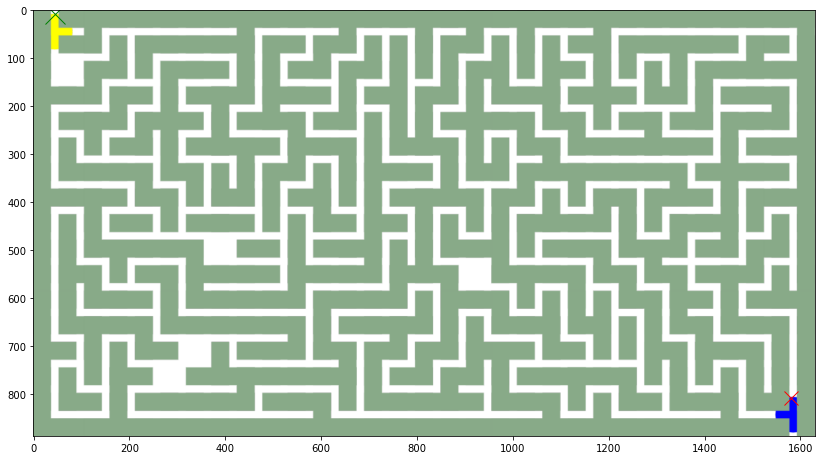

In [42]:
import matplotlib.pylab as plt # I use version 3.1.2
#Notes for installing skimage: https://scikit-image.org/docs/dev/install.html
from skimage.morphology import skeletonize # I use version 0.16.2
import numpy as np # I use version 1.18.1
import cv2
import matplotlib.pyplot as plt
img_name = "C:/Users/ADMIN/Downloads/Hackathon 416/Screenshot_20240212_183051.png"
rgb_img = plt.imread(img_name)

plt.figure(figsize=(14,14))
plt.imshow(rgb_img)
x0,y0 = 45, 8 #start x point
x1,y1 = 1580, 808 #start y point

plt.plot(x0,y0, 'gx', markersize = 20)
plt.plot(x1,y1, 'rx', markersize = 14)

In [46]:
import numpy as np

def generate_random_maze(rows, cols, density=0.3):
    maze = np.random.choice(['0', '1'], size=(rows, cols), p=[1 - density, density])
    return maze

def save_maze_to_file(maze, file_path):
    with open(file_path, 'w') as file:
        for row in maze:
            file.write(''.join(row) + '\n')

# Set the size of the maze
rows = 10
cols = 20

# Generate a random maze with a density of walls (1s) set to 0.3
random_maze = generate_random_maze(rows, cols, density=0.3)

# Replace with the desired file path to save the maze
maze_file_path = "C:/Users/ADMIN/Downloads/Hackathon 416/maze4.txt"

# Save the maze to a text file
save_maze_to_file(random_maze, maze_file_path)


Path found: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 3), (3, 3), (3, 4), (4, 4), (5, 4), (6, 4), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (8, 9), (8, 10), (8, 11), (8, 12), (8, 13), (8, 14), (7, 14), (7, 15), (7, 16), (8, 16), (8, 17), (9, 17), (9, 18), (9, 19)]


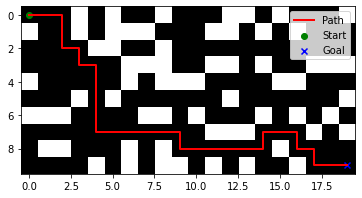

In [47]:
import numpy as np
import heapq
import matplotlib.pyplot as plt

class Node:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.g = 0
        self.h = 0
        self.parent = None

    def __lt__(self, other):
        return (self.g + self.h) < (other.g + other.h)

def heuristic(node, goal):
    return np.sqrt((node.x - goal.x) ** 2 + (node.y - goal.y) ** 2)

def read_maze(file_path):
    with open(file_path, 'r') as file:
        maze = [list(map(int, line.strip())) for line in file.readlines()]
    return maze

def astar(maze, start, goal):
    rows, cols = len(maze), len(maze[0])
    open_set = []
    closed_set = set()

    start_node = Node(start[0], start[1])
    goal_node = Node(goal[0], goal[1])

    heapq.heappush(open_set, start_node)

    while open_set:
        current_node = heapq.heappop(open_set)

        if current_node.x == goal_node.x and current_node.y == goal_node.y:
            path = []
            while current_node:
                path.append((current_node.x, current_node.y))
                current_node = current_node.parent
            return path[::-1]

        closed_set.add((current_node.x, current_node.y))

        for i, j in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
            neighbor_x, neighbor_y = current_node.x + i, current_node.y + j

            if (
                0 <= neighbor_x < rows
                and 0 <= neighbor_y < cols
                and maze[neighbor_x][neighbor_y] == 0
                and (neighbor_x, neighbor_y) not in closed_set
            ):
                neighbor_node = Node(neighbor_x, neighbor_y)
                neighbor_node.g = current_node.g + 1
                neighbor_node.h = heuristic(neighbor_node, goal_node)
                neighbor_node.parent = current_node

                if neighbor_node not in open_set:
                    heapq.heappush(open_set, neighbor_node)

    return None

# Replace with the actual file path of your maze
maze_file_path = "C:/Users/ADMIN/Downloads/Hackathon 416/maze4.txt"
maze = read_maze(maze_file_path)

# Define start and goal points
start_point = (0, 0)
goal_point = (len(maze) - 1, len(maze[0]) - 1)

# Find the path using A*
path = astar(maze, start_point, goal_point)

if path:
    print("Path found:", path)
else:
    print("No path found.")

# Visualize the maze and path
plt.imshow(np.array(maze) == 1, cmap='gray', interpolation='none')

# Plot the path
if path:
    path_x, path_y = zip(*path)
    plt.plot(path_y, path_x, color='red', linewidth=2, label='Path')

# Mark the start and goal points
plt.scatter(start_point[1], start_point[0], color='green', marker='o', label='Start')
plt.scatter(goal_point[1], goal_point[0], color='blue', marker='x', label='Goal')

plt.legend()
plt.show()
